###Title   : Data Visualization Using Python
Purpose : This notebook demonstrates multiple visualization using python

Subject : Feature Engineering |
Module  : Data Visualization |
Date    : 26th Jul 2019 | 
By      : Santosh Vutukuri

###Topic : Following Topics Will Be Covered

Summary Statistics |
Histograms |
Bar Charts / Pie Charts |
Box / Scatter Plots |
Contour Plots |
Heat Maps |
Parallel Coordinates |
TSNE

In [3]:
#Step 1: Import all required libraries for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [14]:
#Step 2: Load the dataset on which we run visualization and save in a dataframe
iris = pd.read_csv('C:/Users/wilp-hyd/Desktop/Desktop Folders/santosh/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
#Step 3: Statitical Description of Data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [61]:
#Step 4: Create datasets for plotting
labels = np.unique(iris.Species)
features = iris.columns[1:4]

In [62]:
#Bar Charts for 1 Feature : Sepal Length
Avgs = []
Maxs = []
Mins = []
Sds = []
for i in range(0,len(labels)):
    Avgs.append(np.average(iris[iris.Species==labels[i]][features[0]]))
    Maxs.append(np.max(iris[iris.Species==labels[i]][features[0]]))
    Mins.append(np.min(iris[iris.Species==labels[i]][features[0]]))
    Sds.append(np.std(iris[iris.Species==labels[i]][features[0]]))

In [63]:
Avgs

[5.006, 5.936, 6.587999999999998]

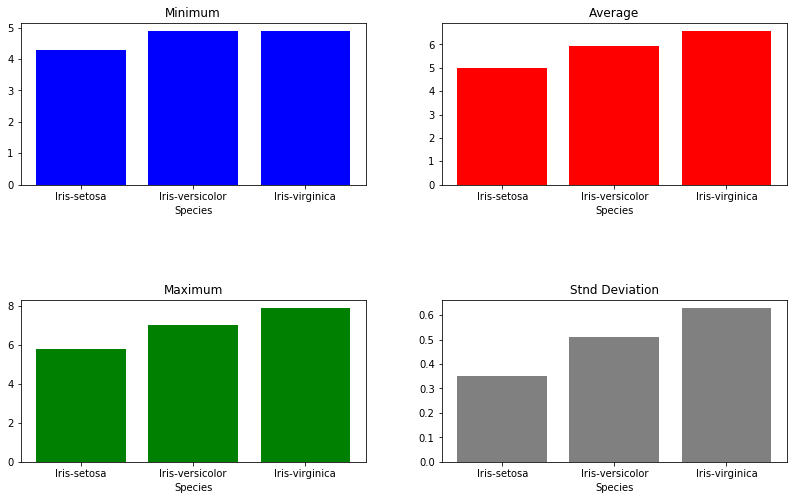

In [64]:
#Bar Charts for 1 Feature : Sepal Length
fig, axes = plt.subplots(nrows=2,ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.bar(x=labels,height=Mins,color='Blue')
ax0.set_title('Minimum')
ax0.set_xlabel('Species')
ax0.set_label

ax1.bar(x=labels,height=Avgs,color='Red')
ax1.set_title('Average')
ax1.set_xlabel('Species')

ax2.bar(x=labels,height=Maxs,color='Green')
ax2.set_title('Maximum')
ax2.set_xlabel('Species')

ax3.bar(x=labels,height=Sds,color='Grey')
ax3.set_title('Stnd Deviation')
ax3.set_xlabel('Species')

fig.tight_layout()
fig.set_size_inches(12,8)

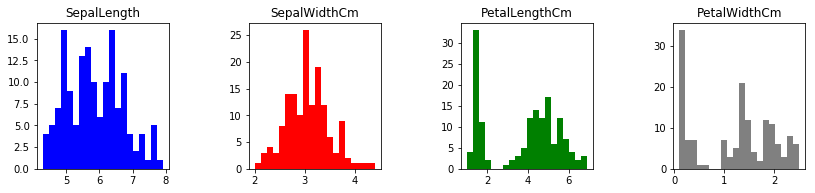

In [15]:
# Histograms for 4 Features : SL, SW, PL, PW
fig, axes = plt.subplots(nrows=1,ncols=4)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(iris['SepalLengthCm'],20,color='Blue')
ax0.set_title('SepalLength')

ax1.hist(iris['SepalWidthCm'],20,color='Red')
ax1.set_title('SepalWidthCm')

ax2.hist(iris['PetalLengthCm'],20,color='Green')
ax2.set_title('PetalLengthCm')

ax3.hist(iris['PetalWidthCm'],20,color='Grey')
ax3.set_title('PetalWidthCm')
fig.tight_layout()
fig.set_size_inches(12,2.5)

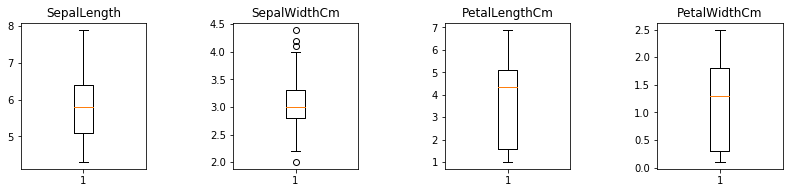

In [17]:
# Histograms for 4 Features : SL, SW, PL, PW
fig, axes = plt.subplots(nrows=1,ncols=4)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.boxplot(iris['SepalLengthCm'])
ax0.set_title('SepalLength')

ax1.boxplot(iris['SepalWidthCm'])
ax1.set_title('SepalWidthCm')

ax2.boxplot(iris['PetalLengthCm'])
ax2.set_title('PetalLengthCm')

ax3.boxplot(iris['PetalWidthCm'])
ax3.set_title('PetalWidthCm')
fig.tight_layout()
fig.set_size_inches(12,2.5)

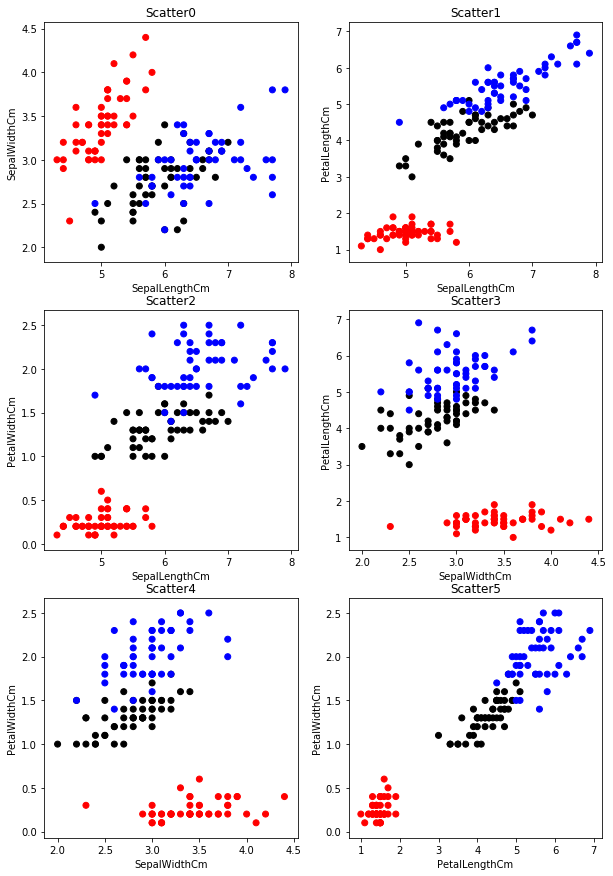

In [19]:
#Scatterplots of the 4 choose 2 pairs of dimensions [IRIS]

fig, axes = plt.subplots(nrows=3,ncols=2)
x = axes.flatten()

k=0
colors = {'Iris-setosa':'Red','Iris-virginica':'Blue','Iris-versicolor':'Black'}
for i in range(1,5,1):
    for j in range(i+1,5,1):
        x[k].scatter(iris[iris.columns[i]],iris[iris.columns[j]],c=iris['Species'].apply(lambda x: colors[x]))
        x[k].set_xlabel(iris.columns[i])
        x[k].set_ylabel(iris.columns[j])
        x[k].set_title('Scatter'+str(k))
        #x[k].legend(loc,colors)
        k=k+1
    
fig.set_size_inches(10,15)

In [65]:
#Pie Chart for Feature 'SepalLengthCm'
cat = []
names = []
cat1 = len(iris[iris['SepalLengthCm']<5])
cat2 = len(iris[(iris['SepalLengthCm']>=5) & (iris['SepalLengthCm']<6)])
cat3 = len(iris[(iris['SepalLengthCm']>=6) & (iris['SepalLengthCm']<7)])
cat4 = len(iris[(iris['SepalLengthCm']>=7) & (iris['SepalLengthCm']<7.5)])
cat5 = len(iris[iris['SepalLengthCm']>=7.5])

In [68]:
names.extend(['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5'])
cat.extend([cat1, cat2, cat3, cat4, cat5])

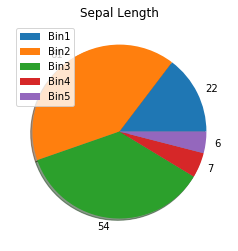

In [71]:
#Pie Chart for 1 Feature : Sepal Length
plt.pie(x=cat,labels=cat,shadow=True)
plt.title('Sepal Length')
plt.legend(names, loc=0)

In [ ]:
# Contour Plot
mountain = pd.read_csv('C:/Users/wilp-hyd/Desktop/Desktop Folders/santosh/mountain.csv')
mountain.head()

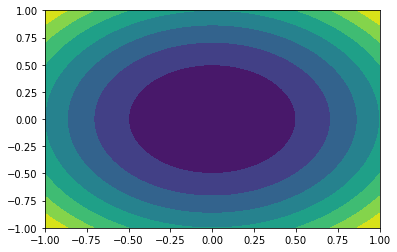

In [24]:
u = np.linspace(-1,1,100)
x, y = np.meshgrid(u, u)
z = x**2+ y**2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(x,y,z)
plt.show()

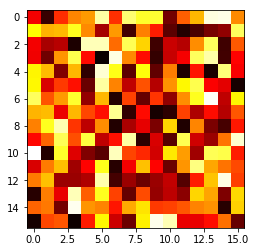

In [21]:
a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [25]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
columns = ['Id','Species']
iris1 = iris.drop(columns,axis=1)

In [27]:
iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


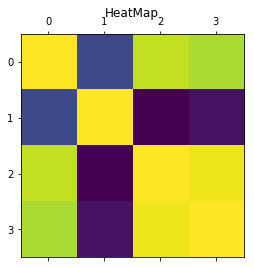

In [28]:
plt.matshow(iris1.corr())
plt.title('HeatMap')
plt.show()

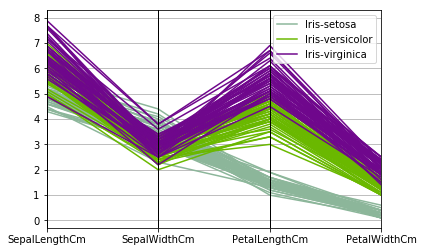

In [29]:
data = pd.read_csv('C:/Users/wilp-hyd/Desktop/Desktop Folders/santosh/iris.csv', sep=',')
data = data.drop('Id',axis=1)
parallel_coordinates(data, 'Species')
plt.show()

In [8]:
earthquake = pd.read_csv('C:/Users/wilp-hyd/Desktop/Desktop Folders/santosh/earthquake.csv', sep=',')

In [9]:
df1 = earthquake[['Date','Depth']]

In [10]:
df2 = df1.head(20)

In [11]:
df2.head()

,Date,Depth
0,01/02/1965,131.6
1,01/04/1965,80.0
2,01/05/1965,20.0
3,01/08/1965,15.0
4,01/09/1965,15.0


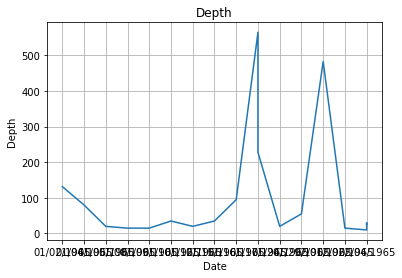

In [12]:
from pylab import *
t = df2['Date']
s = df2['Depth']
plot(t, s)

xlabel('Date')
ylabel('Depth')
title('Depth')
grid(True)
show()

In [1]:
from sklearn.datasets.mldata import fetch_mldata
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [36]:
iris1 = pd.read_csv('D:/BITS_Pilani/2. Python_Session/Final_Files/iris.csv')
iris1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
iris = iris1.drop(['Id','Species'],axis=1)

In [23]:
PCA_2=PCA(n_components=2)
PCA_2.fit=PCA_30.fit_transform(iris.iloc[:,1:4].values)

In [24]:
final = pd.DataFrame(PCA_2.fit[:,])
final.columns = ['PCA1','PCA2']

In [27]:
final['Label']=iris1['Species']

In [28]:
final.head()

,PCA1,PCA2,Label
0,-2.592592,0.192456,Iris-setosa
1,-2.543992,-0.300787,Iris-setosa
2,-2.655167,-0.107229,Iris-setosa
3,-2.461977,-0.198399,Iris-setosa
4,-2.602312,0.291105,Iris-setosa


Text(0.5,1,'PCA2 Vs PCA1')

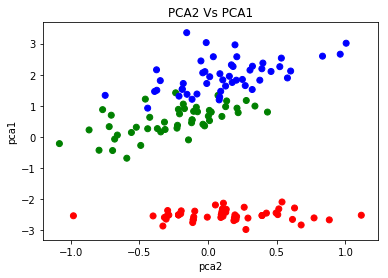

In [33]:
colors = {'Iris-setosa':'Red','Iris-virginica':'Blue','Iris-versicolor':'g'}
plt.scatter(final.PCA2,final.PCA1,c=final['Label'].apply(lambda x: colors[x]))
plt.xlabel('pca2')
plt.ylabel('pca1')
plt.title('PCA2 Vs PCA1')

In [38]:
#X_embedded = TSNE(n_components=2).fit_transform(digits.iloc[:,1:784].values)
#X_embedded.shape

TSNE_2=TSNE(n_components=2)
TSNE_2.fit=TSNE_2.fit_transform(iris.iloc[:,1:4].values)

In [39]:
final = pd.DataFrame(TSNE_2.fit[:,])
final.columns = ['TSNE1','TSNE2']

In [40]:
final['Label']=iris1['Species']

In [41]:
final.head()

,TSNE1,TSNE2,Label
0,-9.142765,20.117470,Iris-setosa
1,-9.307681,17.047861,Iris-setosa
2,-9.683208,17.979898,Iris-setosa
3,-8.853720,17.655815,Iris-setosa
4,-9.058283,20.695305,Iris-setosa


Text(0.5,1,'TSNE2 Vs TSNE1')

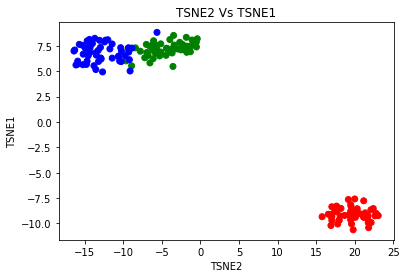

In [42]:
colors = {'Iris-setosa':'Red','Iris-virginica':'Blue','Iris-versicolor':'g'}
plt.scatter(final.TSNE2,final.TSNE1,c=final['Label'].apply(lambda x: colors[x]))
plt.xlabel('TSNE2')
plt.ylabel('TSNE1')
plt.title('TSNE2 Vs TSNE1')